- results are shown here
  - [cluster_analysis.ipynb](./nb/cluster_analysis.md)
  - we try maultple cluster groups [2, 3, 5, 9, 15, 20]
    - the number of cluster groups is always a topic of debate 
    - it depends on the complexity and specificity of the intended analysis 
    - also simplicity is important as simple results are easy to understand 
    - i suggest 5 clusters as a good compromise.  

region cluster analysis for the mosaic campaign 
- loosely based on the method described in
  - https://acp.copernicus.org/preprints/acp-2021-126/
- data and flexpart analysis obtained from 
  - https://srvx1.img.univie.ac.at/webdata/mosaic/mosaic.html

In [1158]:
%load_ext autoreload
%autoreload 2

# import matplotlib as mpl
# import matplotlib.colors
import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns
import xarray as xr

import funs as fu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## constants and functions

In [1163]:

PATH_TO_FILE = '/Users/aliaga/Downloads/AIRTRACER_100m.nc'

LA = 'lat'
LO = 'lon'
TI = 'time'
AG = 'age'
AT = 'AIRTRACER'
L = 'lab'
CM = 'tab20'


# code

In [850]:


# def main():

In [812]:

ds = xr.open_mfdataset(PATH_TO_FILE)

In [813]:
# lets check lat and lon borders
for l in LO, LA:
    a = ds[l].diff(l).to_series().describe()
    print(f'{l}\n{a}\n\n')

lon
count    719.0
mean       0.5
std        0.0
min        0.5
25%        0.5
50%        0.5
75%        0.5
max        0.5
Name: lon, dtype: float64


lat
count    119.00
mean       0.25
std        0.00
min        0.25
25%        0.25
50%        0.25
75%        0.25
max        0.25
Name: lat, dtype: float64




## overall residence time
Lets start by plotting the the sum over time of the flexpart output

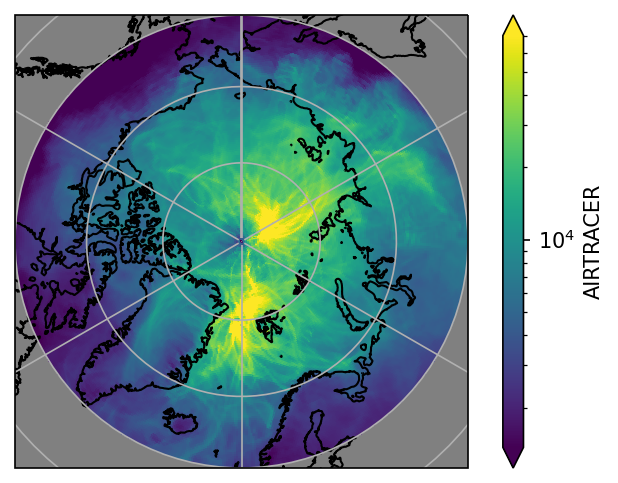

In [881]:

# sum over time and age and load the file in memory
d1 = ds.sum([TI, AG])[AT]
d1.load()
# plot a sum over the campaign
fu.plot_map(d1)

## the ship's path
Lets identify the path taken by the boat. We can euristically determine this 
by using the maximum residence time of the flexpart output at each time step.

/var/folders/xl/wx70j1c50bsdzdy63_wpbhrxpglmw2/T/ipykernel_82253/3423378844.py:70: UserWarning: Use the colorbar set_ticks() method instead.
  cb.ax.set_yticks(ii)
/var/folders/xl/wx70j1c50bsdzdy63_wpbhrxpglmw2/T/ipykernel_82253/3423378844.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(pd.to_datetime(cb.get_ticks()).strftime(date_format='%b %Y'));


[1.570e+18 1.575e+18 1.580e+18 1.585e+18 1.590e+18 1.595e+18 1.600e+18]


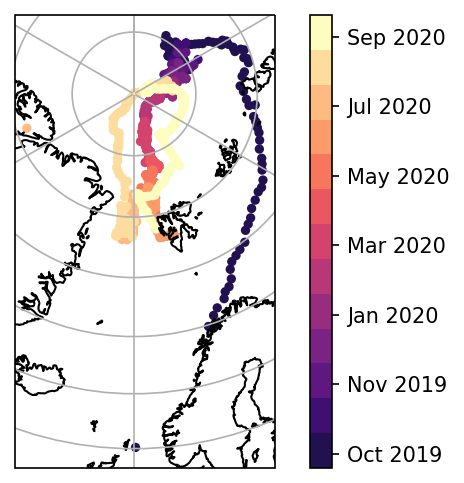

In [815]:
# find the ship path on a euristic basis
d = ds[AT][{AG: 0}].load()
am = d.argmax(dim=[LO, LA])
df = d[am].to_dataframe()
fu.plot_path(df, LO, LA)

## some distributions
Lets also explore the distributions of single 'pixels'.
They seem to be log distributions. 

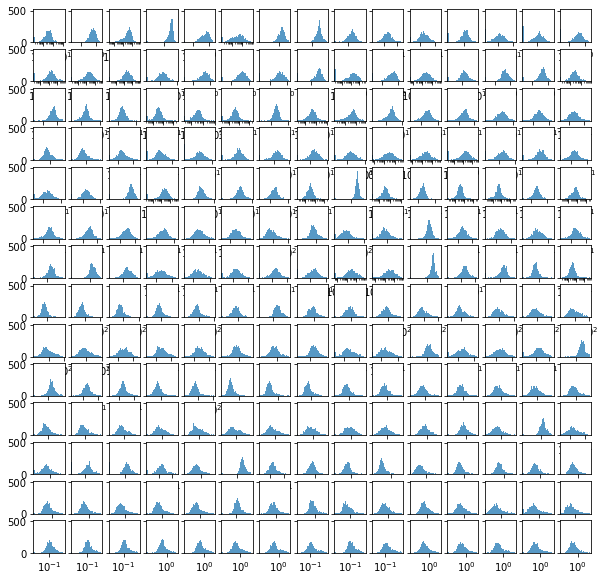

In [816]:
d2 = ds[AT].sum(AG).load()
fu.plot_some_distributions(d2, LA, LO)

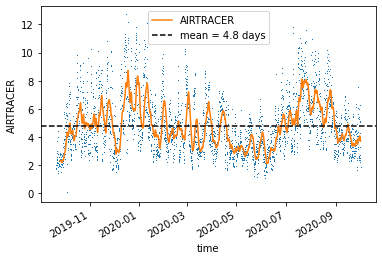

In [818]:

# plot the residence times
fu.plot_residence_time(d2, LA, LO)

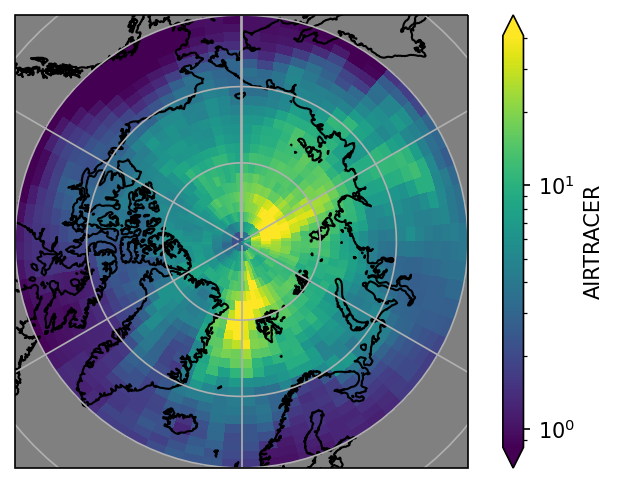

In [882]:
# coarse the array to reduce number of data points and also transform the
# residence from seconds to days
d3 = d2.coarsen({LA: 5, LO: 10}, boundary='exact').sum() / 3600 / 24
# plot the coarse array
fu.plot_map(d3.sum(TI))

In [883]:
qta = fu.get_quantiles(d3, TI)

/Users/aliaga/py-packs/flexpart-mosaic/nb/funs.py:335: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


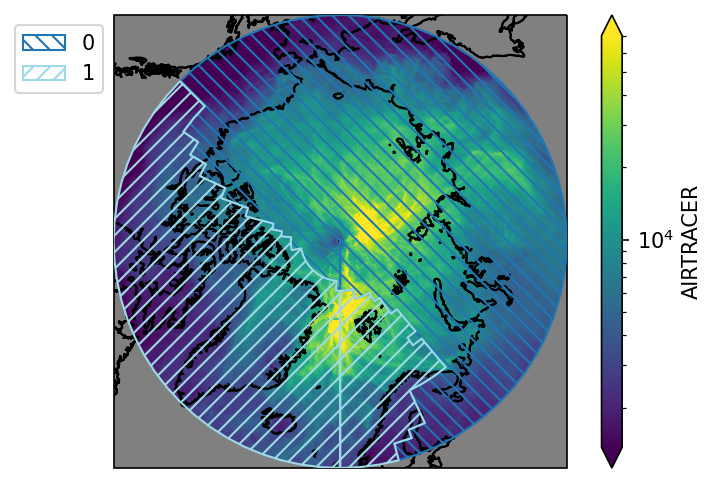

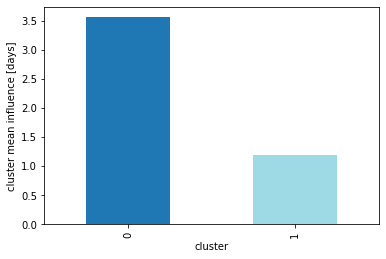

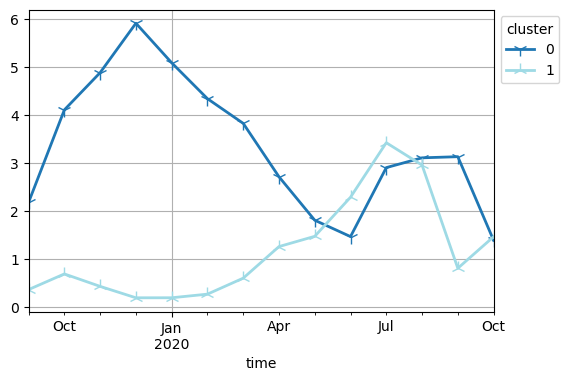

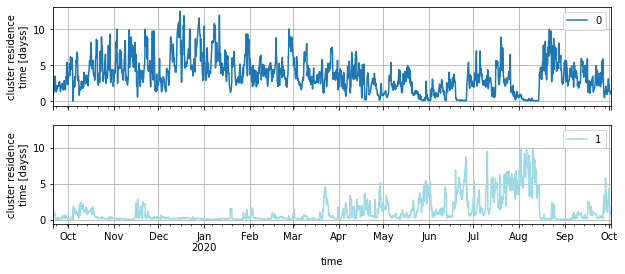

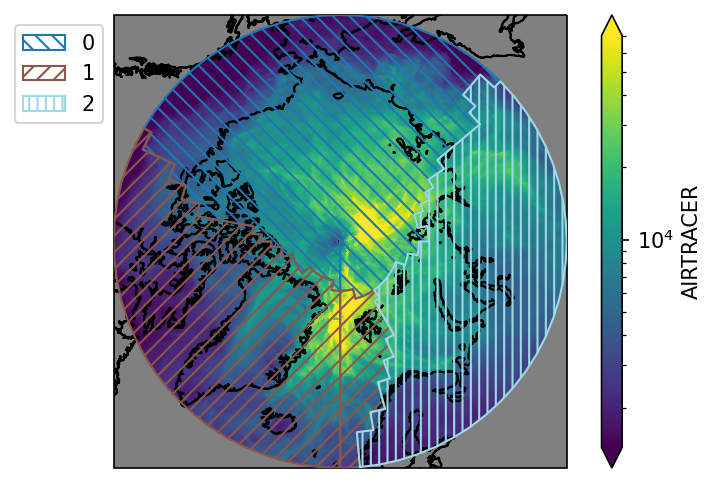

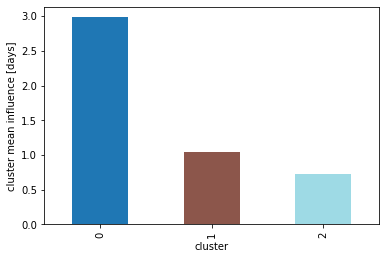

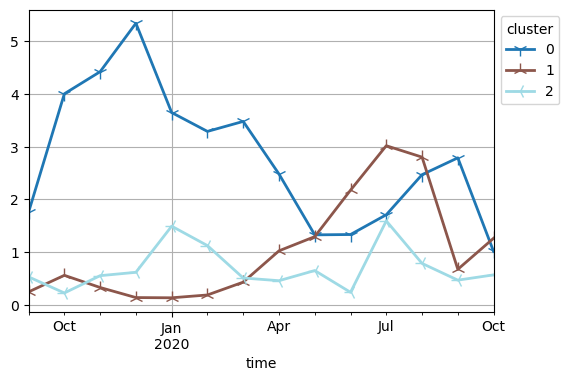

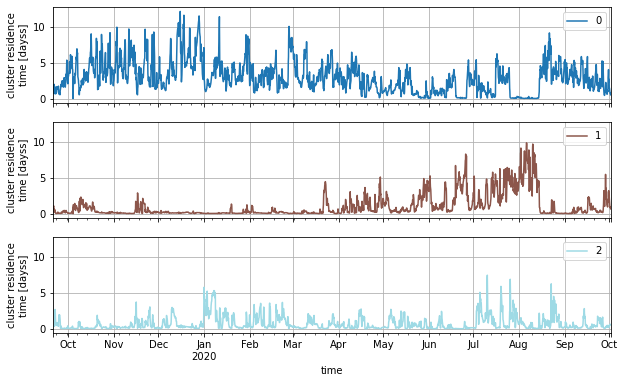

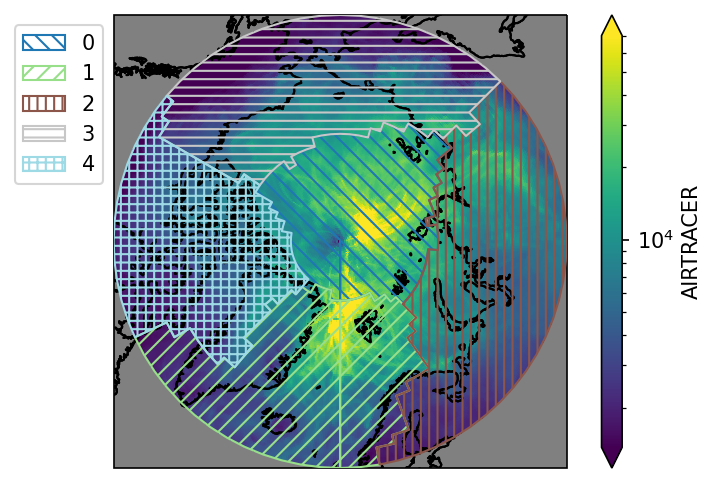

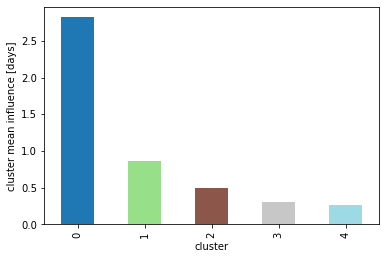

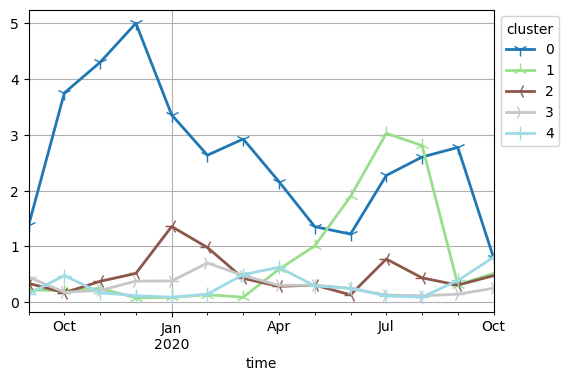

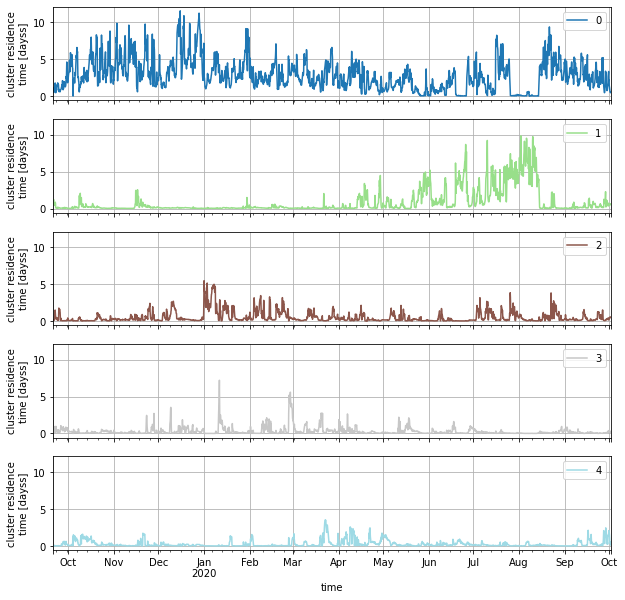

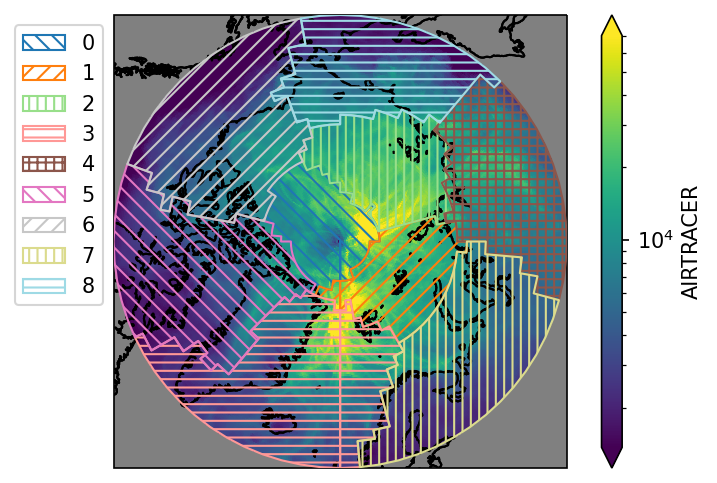

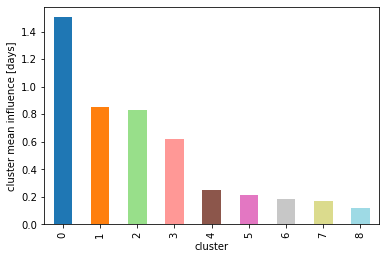

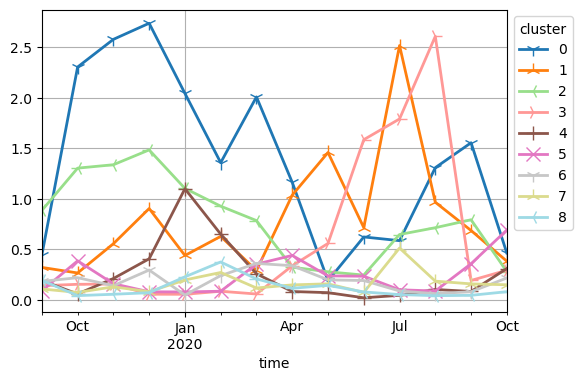

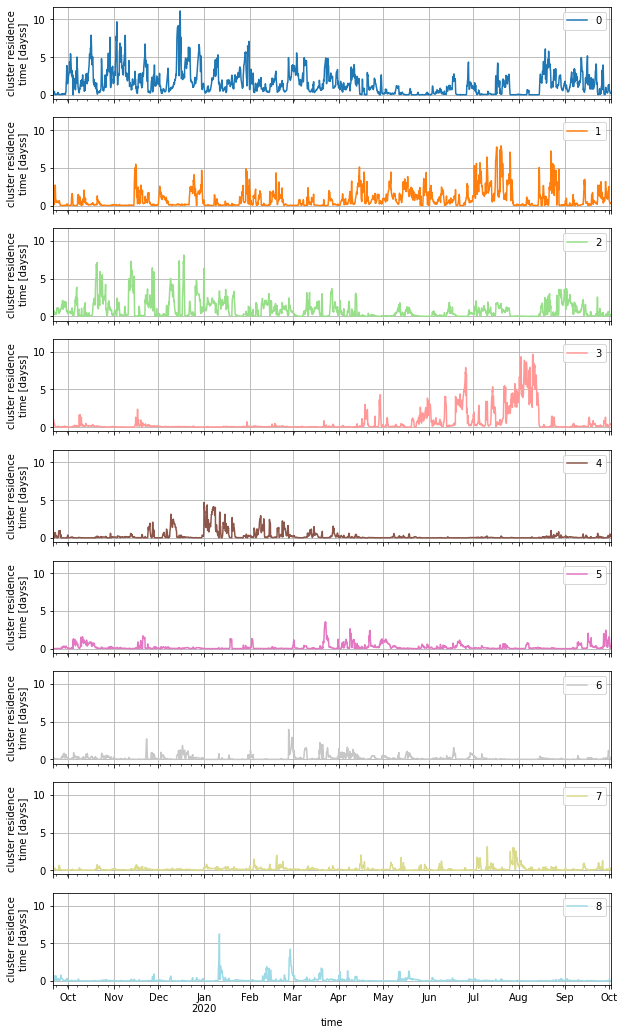

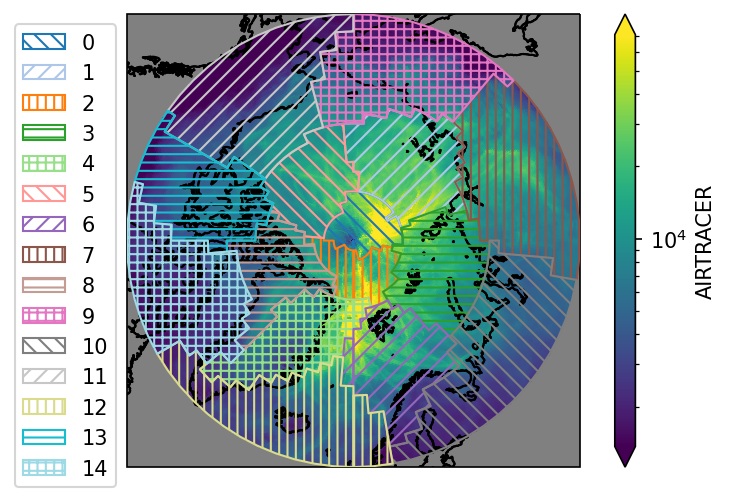

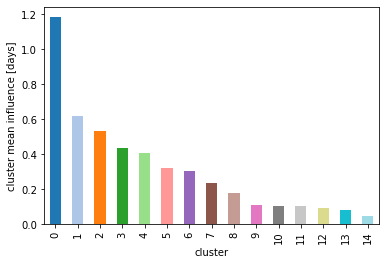

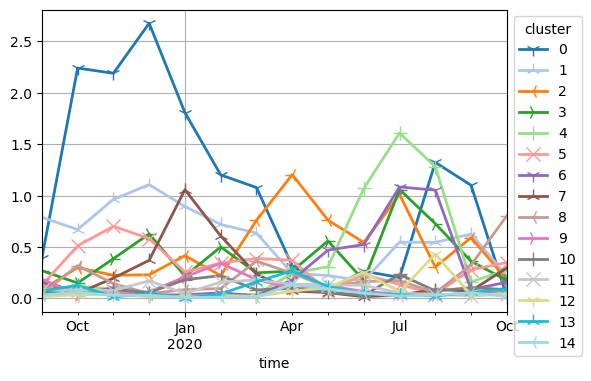

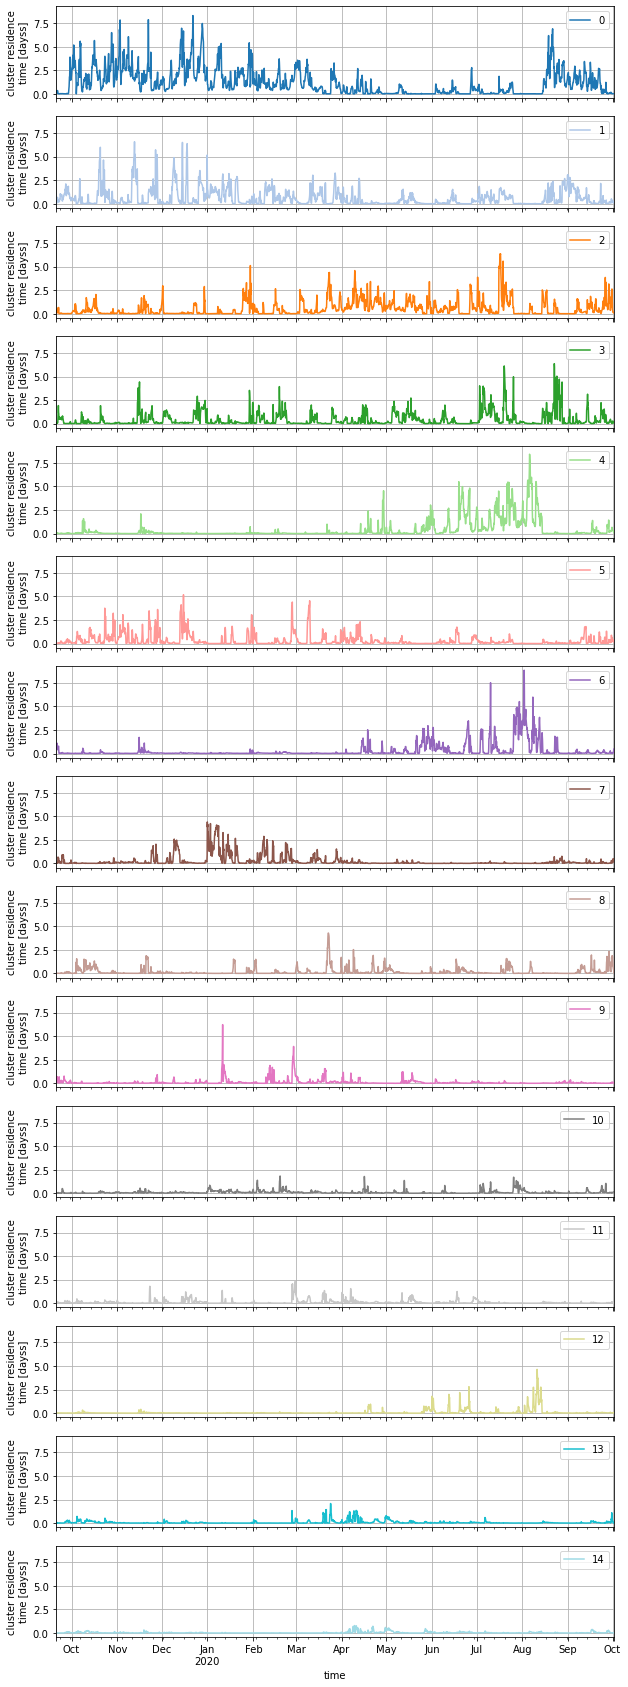

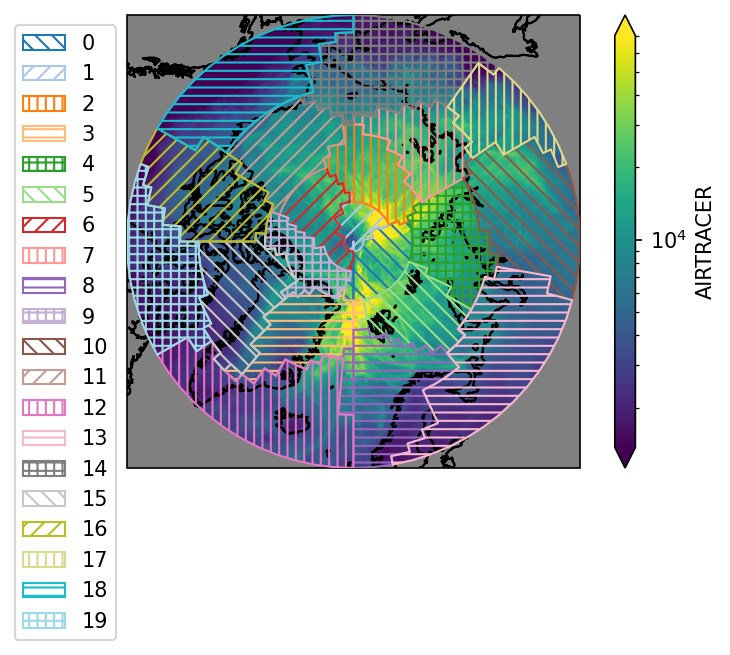

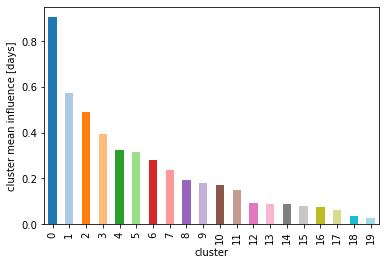

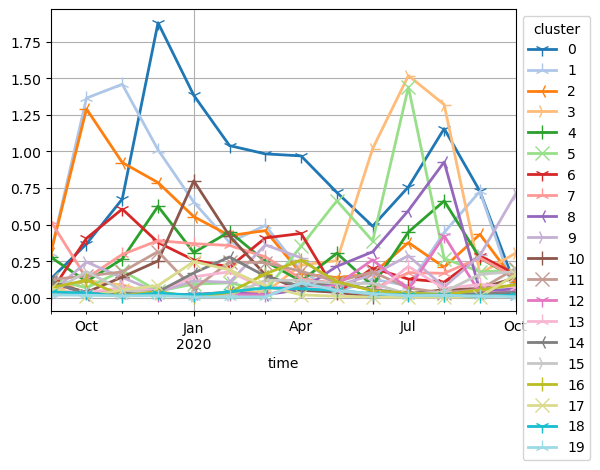

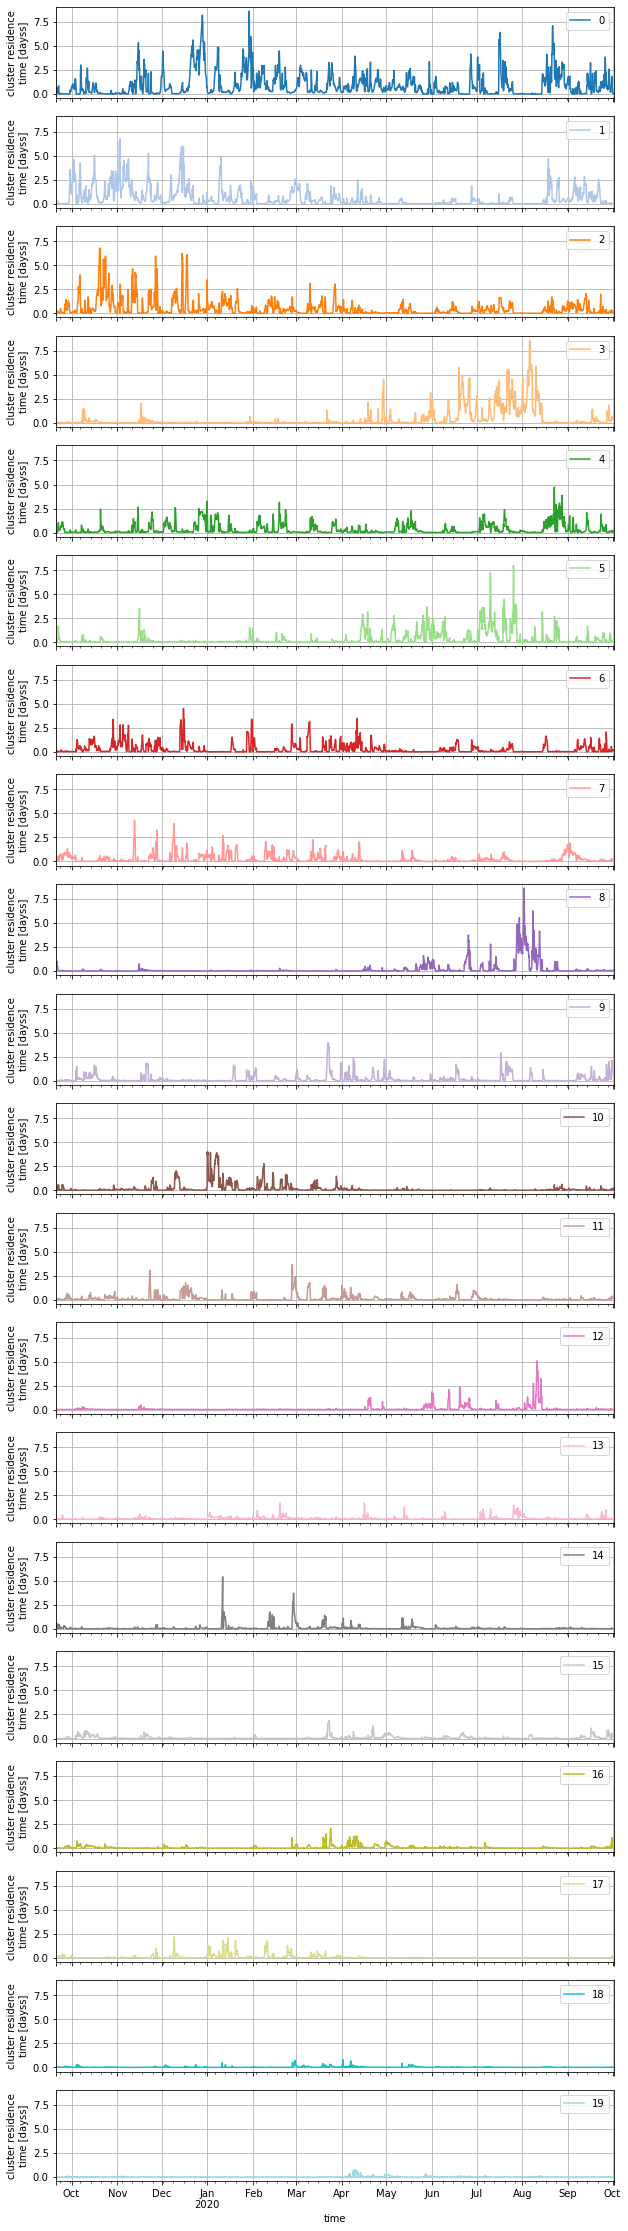

In [1168]:
for N in [2, 3, 5, 9, 15, 20]:
    d4 = fu.kmeans_cluster(N, qta, d3, L, TI, )

    lax = d4[L]
#     fu.plot_kmap(lax, N, CM)
    fu.plot_hatch(d4, L, N, d1, LA, LO, CM)
    fu.plot_cluster_bar(N, d4, L, CM)
    fu.plot_month_means(d4, L, CM, N)
    fu.plot_cluster_ts(N, d4, L, CM)